## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [29]:
# imports for proj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

**Q0.**
1. What is the difference between regression and classification?

**Regression** predicts continuous numerical values.
**Classification** predicts discrete categories.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table compares actual vs. predicted classifications. It shows how successful it is.
Which includes:
True Positives (TP): Correctly predicted positives.
True Negatives (TN): Correctly predicted negatives.
False Positives (FP): Incorrectly predicted positives (Type I error).
False Negatives (FN): Incorrectly predicted negatives (Type II error).

3. What does the SSE quantify about a particular model?

**Sum of Squared Errors** (SSE) measures how far predictions are from actual values, lower SSE indicates a better model fit.

4. What are overfitting and underfitting?

**Overfitting**: The model memorizes training data, including noise, but performs poorly on new data.

**Underfitting**: The model is too simple, failing to learn patterns even in training data.

A well-balanced model avoids both issues for better generalization.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

The training set is used to train the model, while the test set checks how well it performs on unseen data.

Evaluating different values of 𝑘 (e.g., in k-NN) on the test set helps choose a model that generalizes well, avoiding overfitting or underfitting.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Class Label Prediction (Single Output):
- Simple and easy to interpret.
- Does not indicate confidence in the prediction.

Probability Distribution (Soft Prediction):
- Provides confidence levels (e.g., 80% chance of "positive," 20% of "negative").
- More complex to interpret and requires a threshold to make decisions.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [19]:
car_df = pd.read_csv('USA_cars_datasets.csv')
df = car_df[['price', 'year', 'mileage']]
missing_values = df.isna().sum()

2. Maxmin normalize `year` and `mileage`.

In [26]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df.loc[:, 'year'] = (df['year'] - np.min(df['year'])) / (np.max(df['year']) - np.min(df['year']))
df.loc[:, 'mileage'] = (df['mileage'] - np.min(df['mileage'])) / (np.max(df['mileage']) - np.min(df['mileage']))

<ipython-input-26-ecb76e7b2712>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'], errors='coerce')
<ipython-input-26-ecb76e7b2712>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')


3. Split the sample into ~80% for training and ~20% for evaluation.

In [30]:
X = df[['year', 'mileage']]
y = df['price']

print(X.head(), X.describe(), sep="\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

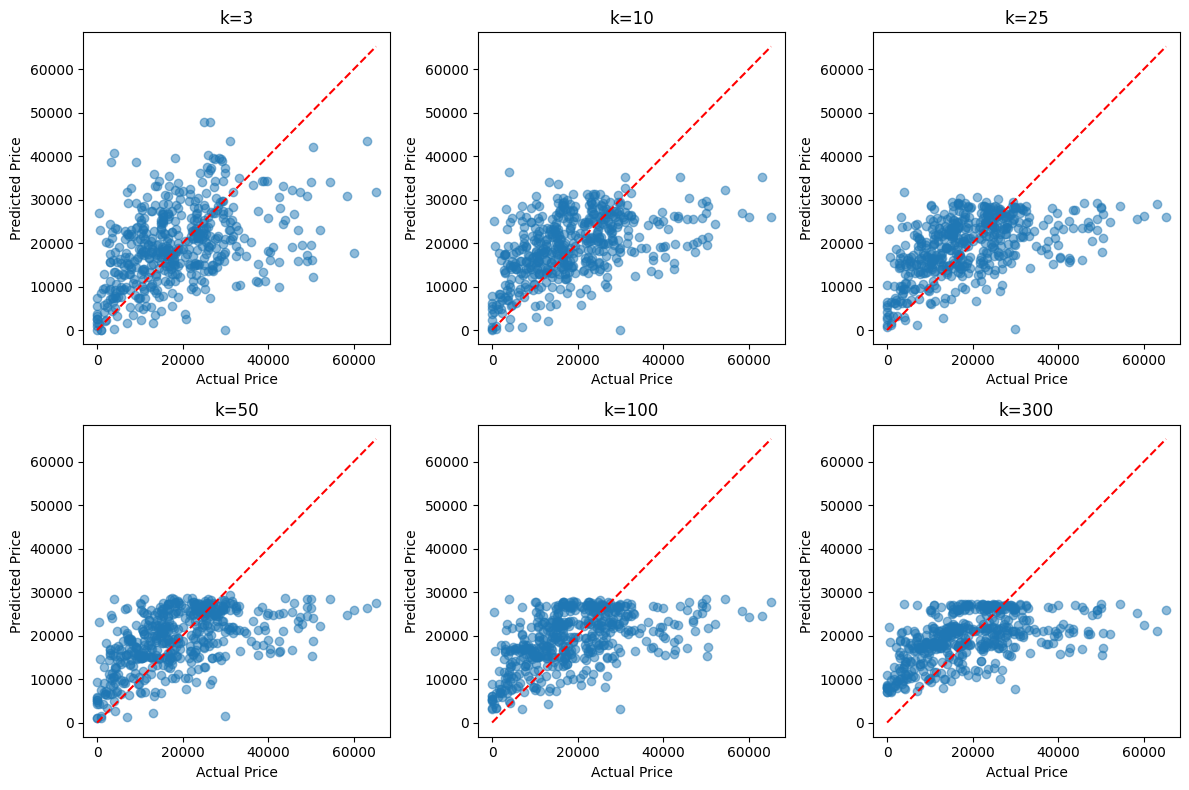

In [31]:
k_values = [3, 10, 25, 50, 100, 300]
SSE = []

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, k in enumerate(k_values):
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SSE.append(np.sum((y_test - y_hat) ** 2))

    # plot of actual vs predicted prices
    ax = axes[i // 3, i % 3]
    ax.scatter(y_test, y_hat, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    ax.set(xlabel='Actual Price', ylabel='Predicted Price', title=f'k={k}')

plt.tight_layout()
plt.show()

5. Determine the optimal $k$ for these data.

In [33]:
opt_k = k_values[np.argmin(SSE)]  # k corresponding to the minimum SSE

print("SSE values:", SSE)
print(f'Optimal k: {opt_k}')

SSE values: [66743996748.22221, 55794351309.369995, 52481392435.063995, 51936596609.9804, 52267499629.60631, 53828840368.12019]
Optimal k: 50


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

When k is too large, the model underfits because it averages too many neighbors, making predictions too general and ignoring details. When k is too small, the model overfits by relying too much on nearby points, making it very sensitive to outliers.




